In [25]:
import pandas as pd
df = pd.read_csv(r'DATASETS\playground-series-s4e11\train.csv')

In [26]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [50]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Profession           36630
CGPA                112802
Job Satisfaction     27910
Dietary Habits           4
Degree                   2
dtype: int64


In [52]:
df['Profession'].head()


0                Chef
1             Teacher
2                 NaN
3             Teacher
4    Business Analyst
Name: Profession, dtype: object

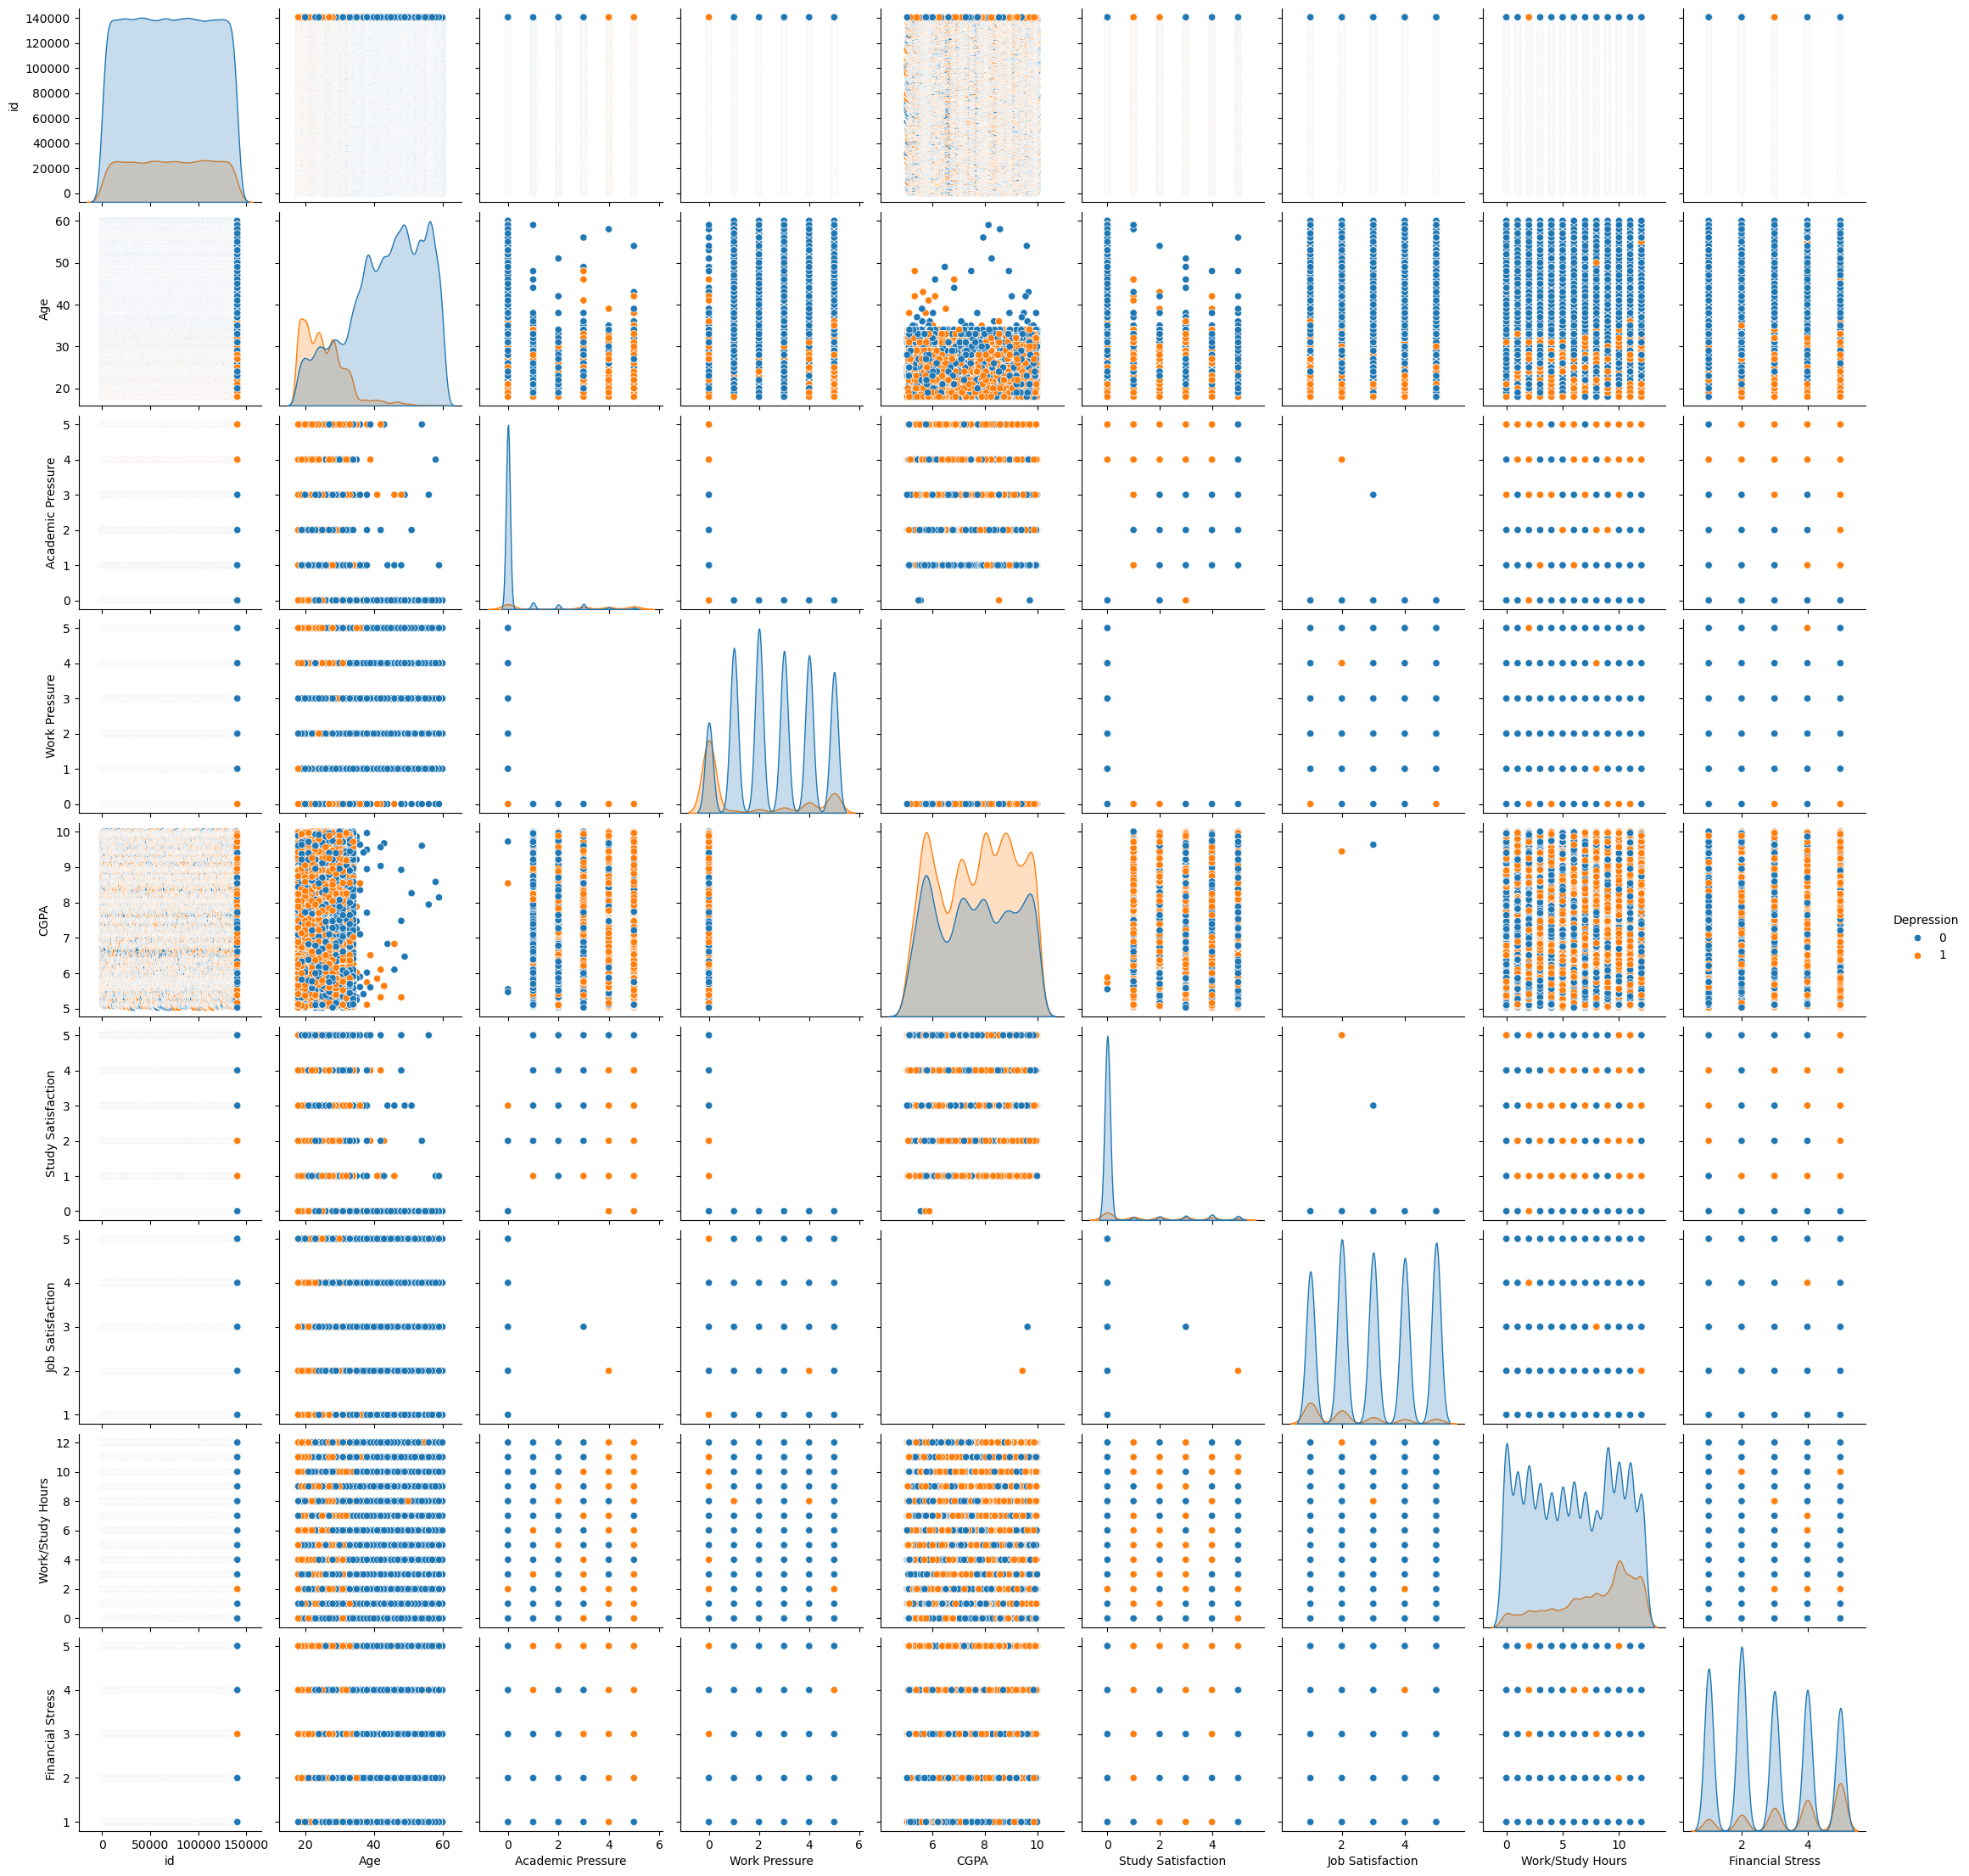

In [54]:
import seaborn as sns
sns.pairplot(df, hue='Depression')

In [ ]:
sns.JointGrid(df[['']], hue='Depression')

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

imputer = SimpleImputer(missing_values='NaN',strategy='most_frequent')

    # df['Profession'] = imputer.fit_transform(df[['Profession']])
knn_imputer = KNNImputer(n_neighbors=5)
for col in ['Financial Stress', 'Degree', 'Dietary Habits']:
    df[col] = imputer.fit_transform(df[[col]])


ValueError: 'X' and 'missing_values' types are expected to be both numerical. Got X.dtype=float64 and  type(missing_values)=<class 'str'>.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


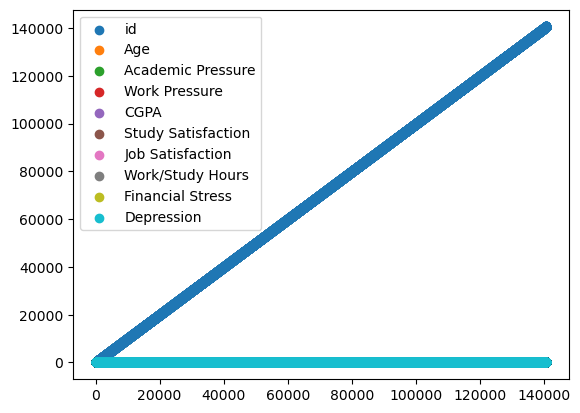

Original dataset:
            id   Age  Academic Pressure  Work Pressure  CGPA  \
0            0  49.0                NaN            5.0   NaN   
1            1  26.0                NaN            4.0   NaN   
2            2  33.0                5.0            NaN  8.97   
3            3  22.0                NaN            5.0   NaN   
4            4  30.0                NaN            1.0   NaN   
...        ...   ...                ...            ...   ...   
140695  140695  18.0                NaN            5.0   NaN   
140696  140696  41.0                NaN            5.0   NaN   
140697  140697  24.0                NaN            3.0   NaN   
140698  140698  49.0                NaN            5.0   NaN   
140699  140699  27.0                4.0            NaN  9.24   

        Study Satisfaction  Job Satisfaction  Work/Study Hours  \
0                      NaN               2.0               1.0   
1                      NaN               3.0               7.0   
2              

In [29]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
# Select only numeric columns
data = df.select_dtypes(include=['number'])
z = stats.zscore(data)
outlier_threshold = 3.0

# Identify outliers based on threshold
outliers_mask = np.abs(z) > outlier_threshold

# Visualize the dataset with outliers highlighted
for column in data.columns:
	plt.scatter(np.arange(len(data)), data[column], label=column)

plt.legend()
plt.show()

# Remove outliers from the dataset
filtered_data = data[(np.abs(z) <= outlier_threshold).all(axis=1)]

print("Original dataset:")
print(data)
print("Filtered dataset (without outliers):")
print(filtered_data)



In [ ]:
df['Study Satisfaction'] = df['Study Satisfaction'].fillna(0.0)
df['Academic Pressure'] = df['Academic Pressure'].fillna(0.0)
df['Work Pressure'] = df['Work Pressure'].fillna(0.0)
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(0.0)
